In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
#Filling Gender column by mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode().values[0])
#Filling Married column by mode 
df['Married']=df['Married'].fillna(df['Married'].mode().values[0])
#Filling Dependents column by mode
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode().values[0])
#Filling Self_Employed column by mode
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode().values[0])
#Filling LoanAmount column by mean
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
#Filling Loan_Amount_Term column by mode
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().values[0] )
#Filling Credit_History column by mode
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode().values[0] )

df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
df.drop('Loan_ID', axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [32]:
df.shape

(614, 12)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Male      502
Female    112
Name: Gender, dtype: int64

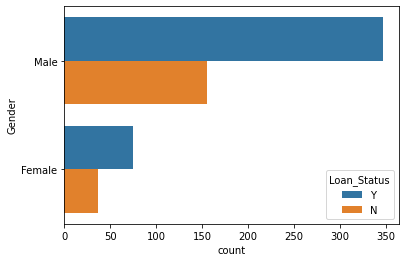

In [35]:
sns.countplot(y = 'Gender', hue = 'Loan_Status', data = df)
df['Gender'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

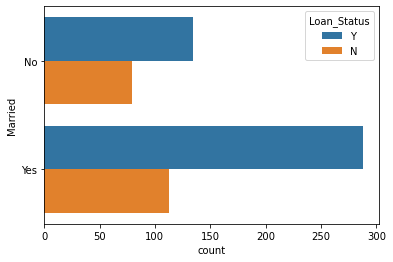

In [37]:
sns.countplot(y= 'Married', hue= 'Loan_Status', data= df)
df['Married'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

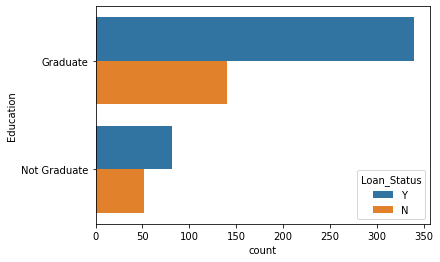

In [38]:
sns.countplot(y = 'Education', hue = 'Loan_Status', data = df)
df['Education'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

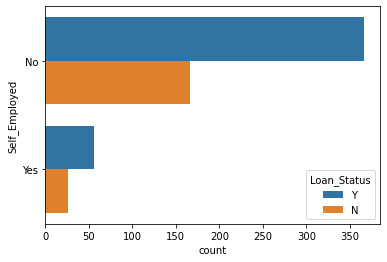

In [39]:
sns.countplot(y= 'Self_Employed', hue= 'Loan_Status', data= df)
df['Self_Employed'].value_counts()

<AxesSubplot:xlabel='count', ylabel='Credit_History'>

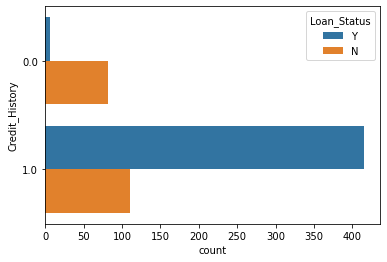

In [41]:
sns.countplot(y= 'Credit_History', hue= 'Loan_Status', data=df)

In [44]:
#Converting some object data type to int
gender = {"Female": 0, "Male": 1}
yes_no = {'No' : 0,'Yes' : 1}
dependents = {'0':0,'1':1,'2':2,'3+':3}
education = {'Not Graduate' : 0, 'Graduate' : 1}
property = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}
output = {"N": 0, "Y": 1}
df['Gender'] = df['Gender'].replace(gender)
df['Married'] = df['Married'].replace(yes_no)
df['Dependents'] = df['Dependents'].replace(dependents)
df['Education'] = df['Education'].replace(education)
df['Self_Employed'] = df['Self_Employed'].replace(yes_no)
df['Property_Area'] = df['Property_Area'].replace(property)
df['Loan_Status'] = df['Loan_Status'].replace(output)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


In [47]:
x = df.drop('Loan_Status', 1)
y = df.Loan_Status

/tmp/ipykernel_5021/2535632555.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = df.drop('Loan_Status', 1)


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size= 0.25, random_state=38, stratify = y)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [50]:
prediction_knn = knn.predict(X_test)

print("Prediction for test set: {}".format(prediction_knn))

Prediction for test set: [1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1]


In [51]:
a = pd.DataFrame({'Actual value': Y_test, 'Predicted value': prediction_knn})
a.head()

,Actual value,Predicted value
263,1,1
395,1,1
226,0,0
413,1,1
403,1,0


              precision    recall  f1-score   support

           0       0.39      0.19      0.25        48
           1       0.70      0.87      0.78       106

    accuracy                           0.66       154
   macro avg       0.55      0.53      0.51       154
weighted avg       0.61      0.66      0.61       154



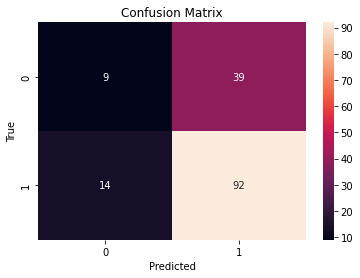

In [52]:
#Confusion matrix and classification report
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(Y_test, prediction_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(Y_test, prediction_knn))